# **Project Name**    - Exploratory Data Analysis (EDA) on YES Bank stock price data



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** - Mir Sadab Ali
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

In this project, we conducted an in-depth Exploratory Data Analysis (EDA) on the stock price dataset of YES Bank. The dataset consists of monthly records containing four primary features: Open, High, Low, and Close prices. Our objective in this phase was to thoroughly explore and understand the behavior of these features, their relationships, and any patterns or insights that can be derived before moving into predictive modeling.

We started by performing initial data understanding and cleaning. The dataset was already free of missing values and duplicates, which allowed us to directly proceed to analysis. The ‘Date’ column, which originally contained month and year (e.g., ‘Jul-05’), was converted to proper datetime format and set as the index. This was crucial for time-based analysis and visualization.

**Univariate Analysis** was conducted for each feature. We observed that all price-related features (Open, High, Low, Close) exhibited right-skewed distributions. The presence of right skew indicates that while most of the values are clustered around the lower price range, there are some periods where extremely high prices were recorded. This can suggest occasional market booms or periods of significant price surges. To address this skewness and bring the features closer to a normal distribution, we applied a Power Transformer, which successfully normalized the data distribution. This transformation is especially useful if we plan to apply machine learning models later, as many algorithms perform better on normally distributed data.

**Visualizations** played a key role in our analysis. A time series line plot of Close prices revealed multiple peaks and troughs over the years, indicating the presence of both growth and decline periods. Boxplots highlighted the presence of outliers in all price features, confirming the high volatility that is common in stock markets. The correlation heatmap showed very high positive correlations between Open, High, Low, and Close prices. This suggests that all these features move closely together, which is expected in stock price data where daily prices are often interrelated.

**Bivariate Analysis** using scatterplots between different features further confirmed these strong relationships. For example, Open vs Close price scatterplots showed a near-linear relationship, meaning that opening prices generally give a good indication of closing prices.

We also examined volatility, calculated as the difference between High and Low prices. Plotting volatility over time revealed that certain periods were significantly more volatile, which can be a sign of market uncertainty or major financial events affecting YES Bank during those months.

Seasonality and autocorrelation were explored using seasonal decomposition and autocorrelation plots. The results indicated that past prices have some level of influence on future prices, suggesting that time-series models may be suitable for future forecasting tasks.

Finally, we examined returns and risks by analyzing daily returns and cumulative returns. The distribution of daily returns showed fat tails, suggesting occasional large positive or negative returns. This is important for investors to understand potential risks involved with trading YES Bank stock.

In conclusion, this EDA phase has successfully provided a comprehensive understanding of the YES Bank stock price behavior. We identified volatility patterns, skewed distributions, strong correlations, and early indications of seasonality. These insights lay a strong foundation for future modeling and business decisions. The findings can help stakeholders in better risk management, investment planning, and informed financial decision-making.


# **GitHub Link -**

https://github.com/SadabAli/Labmentix/blob/main/task-1(15-06-25)/src/Sample_EDA_Submission_Template.ipynb

# **Problem Statement**


**The client has shared stock price data for YES Bank. Right now, there is no clear understanding of how the stock prices are changing over time. Before doing any forecasting or prediction, we need to carefully explore the data. The goal is to study the price movements, find any patterns, check relationships between different price columns, and spot any sudden changes or unusual behavior. This analysis will help us understand the data better and get useful insights which can support future business decisions and model building.**

#### **Define Your Business Objective?**

The main business objective is to understand how YES Bank stock prices behave over time. By analyzing past stock price data, we want to find patterns, trends, relationships, and any unusual movements. This understanding can help investors, financial analysts, and decision makers to better manage risks, plan investments, and prepare for future changes in the market. This EDA is the first step before building any predictive model or making business decisions based on the data.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import scipy.stats as stats 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  PowerTransformer

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Labmentex\task-1(15-06-25)\data\raw\data_YesBank_StockPrices.csv")

### Dataset First View

In [3]:
# Dataset First Look
df.sample(7)

,Date,Open,High,Low,Close
126,Jan-16,145.0,149.90,126.45,149.38
79,Feb-12,65.9,74.80,63.60,69.14
119,Jun-15,177.0,179.40,158.90,168.60
151,Feb-18,355.0,366.50,304.65,322.25
109,Aug-14,107.4,118.69,103.31,114.33
64,Nov-10,72.2,77.60,58.00,61.21
86,Sep-12,66.2,77.69,64.46,76.44


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    185
Name: count, dtype: int64

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [8]:
# Visualizing the missing values

"""
There is no missing and duplicate value in this dataset
"""

df.sample(1)

,Date,Open,High,Low,Close
27,Oct-07,41.8,47.3,33.6,43.48


### What did you know about your dataset?

### What I know about my dataset:
This is a time series forecasting dataset related to **YES Bank stock prices**.

The **Date** column contains both month and day (e.g., **Nov-18**), which will help in time-based sorting and visualization.

The dataset has the following key columns:
**Open**, **High**, **Low**, **Close**

My target variable for prediction is the **Close** price, which represents the closing price of the stock each month.

During model training, I will define:
    ```
    y = df['Close']
    ```

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

In [10]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

The Variabel **Open	 High  Low	Close** Looks like right-skewed distribution{(min,25%,50%-> gradually increases),(75%,max/100%--> fast increases)}....

if this is true the i will use **Power Transformer** for For making distribution closer to **Normal Distribution**

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

In [13]:

# Initially, I thought the 'Date' column had month and day (like MM-DD), 
# but after checking the format like 'Jul-05', I realized it's actually Month-Year (MM-YYYY or %b-%y).

# So, I converted it properly using datetime:

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Since the original data doesn't include the 'day', we assume it as the 1st of each month.
# This helps in time series sorting and later indexing.
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

In [14]:
df.head(3)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30


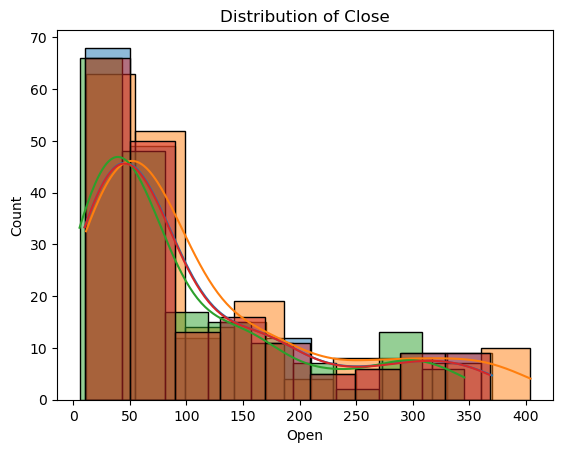

In [15]:
for col in ['Open','High','Low','Close']:
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show

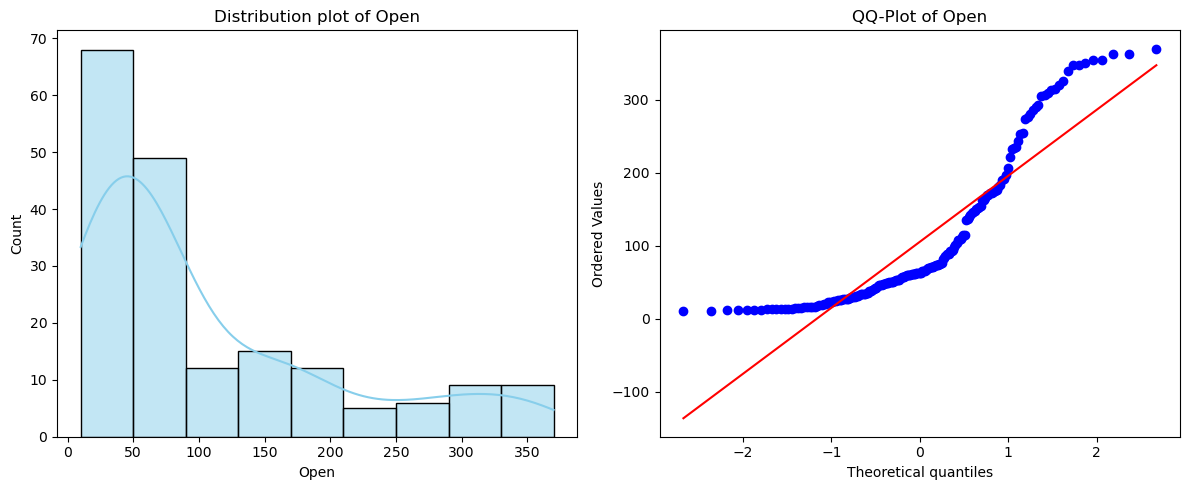

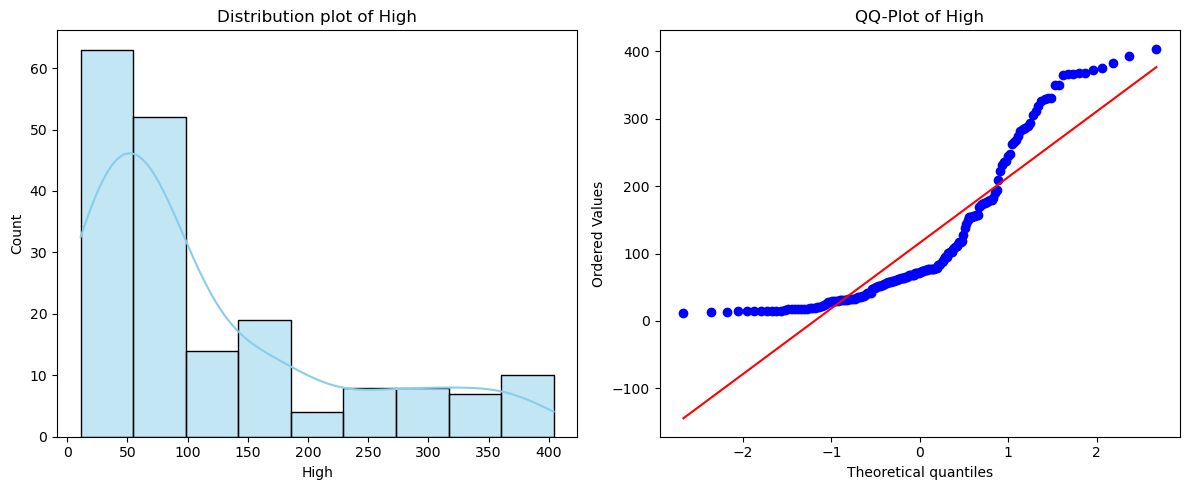

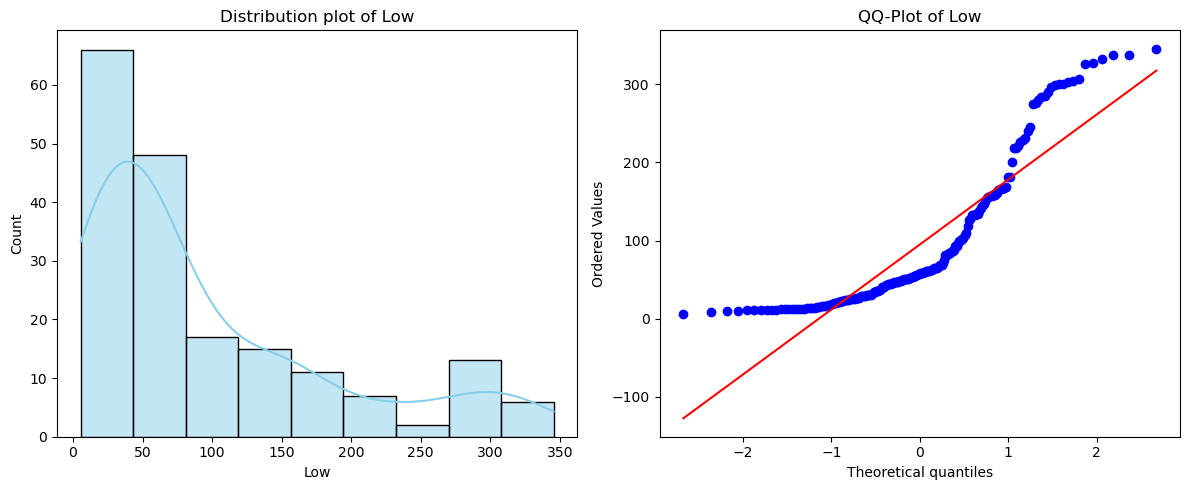

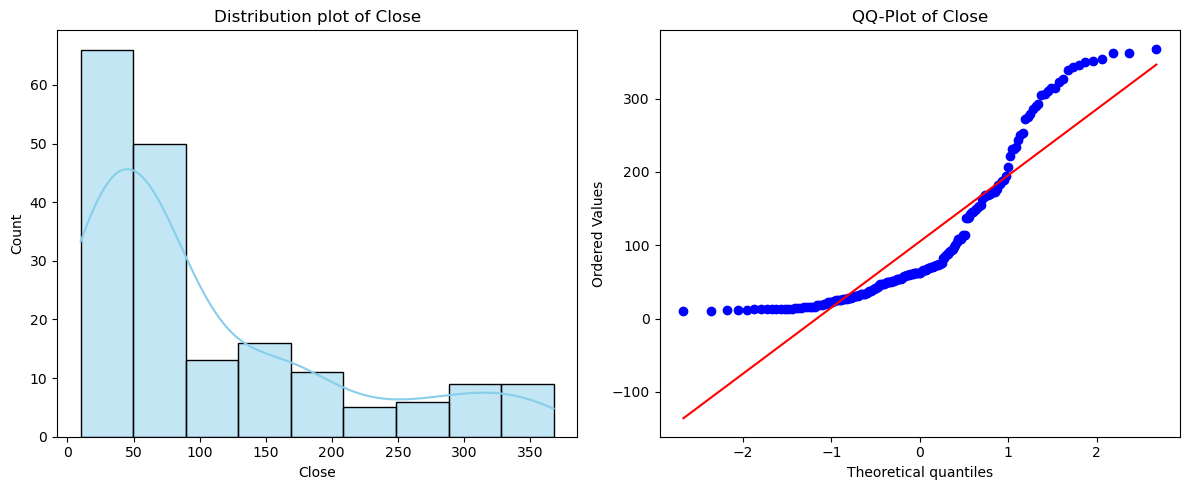

In [16]:
featur = ['Open','High','Low','Close'] 
for i in featur:
    plt.figure(figsize=(12,5))

    ## Histogram 
    plt.subplot(1,2,1)
    sns.histplot(df[i],kde=True,color='skyblue')
    plt.title(f"Distribution plot of {i}") 

    ## QQ-Plot 
    plt.subplot(1,2,2)
    stats.probplot(df[i],dist='norm',plot=plt)
    plt.title(f"QQ-Plot of {i}")

    plt.tight_layout()
    plt.show()

In [17]:
print(df.sample(3))
len(df)

              Open    High     Low   Close
Date                                      
2014-07-01  108.43  114.46  100.44  108.21
2006-02-01   15.50   16.97   15.40   16.12
2014-03-01   60.52   83.36   60.34   82.70


185

In [18]:
train_size = int(len(df) * 0.8)  # i wanna split 80-20 ()
train_size

148

In [34]:
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [36]:
len(test)

37

In [38]:
## Applying Yeo-Johnson rransformer 
pt = PowerTransformer(method='yeo-johnson')

In [39]:
train_trf = pt.fit_transform(train)
test_trf = pt.transform(test)

In [40]:
type(train_trf)

numpy.ndarray

In [41]:
columns = ['Open', 'High', 'Low', 'Close']
train_trf_df = pd.DataFrame(train_trf,columns=columns,index=train.index)

In [42]:
train_trf_df.sample(3)

,Open,High,Low,Close
Date,,,,
2016-08-01,1.530880,1.584453,1.581827,1.629650
2006-10-01,-1.301708,-1.179908,-1.173413,-1.106683
2016-12-01,1.491258,1.454338,1.477675,1.448614


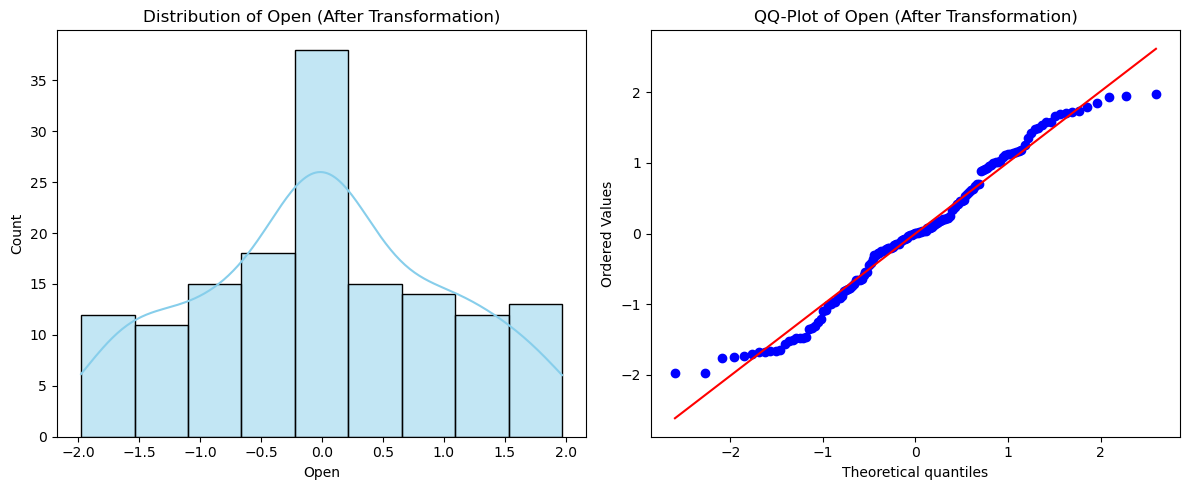

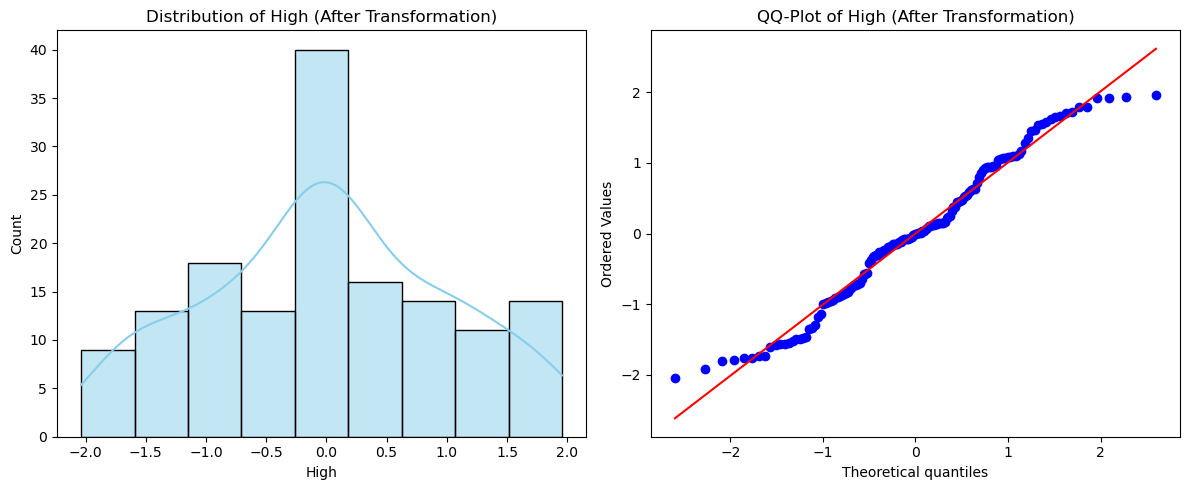

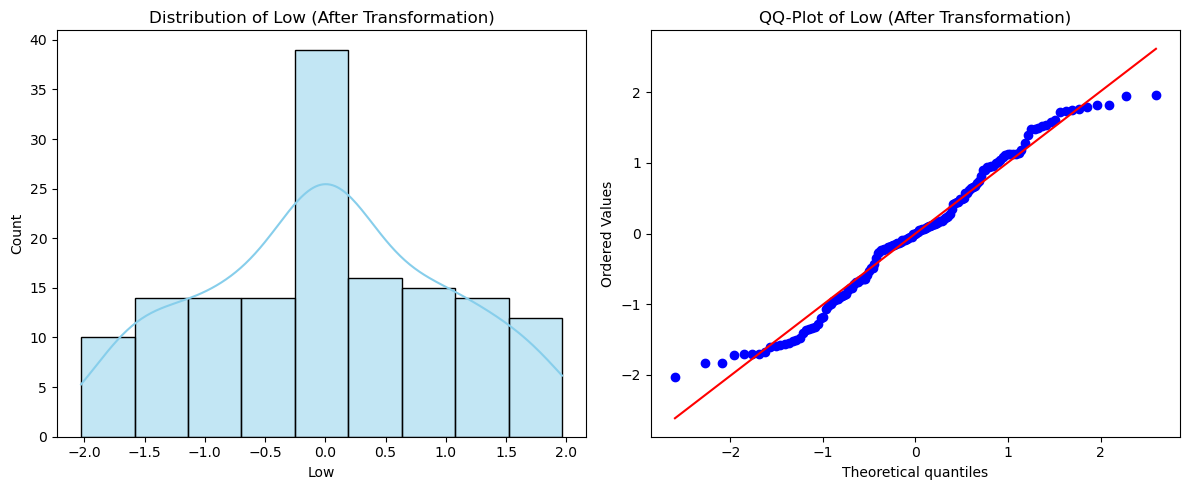

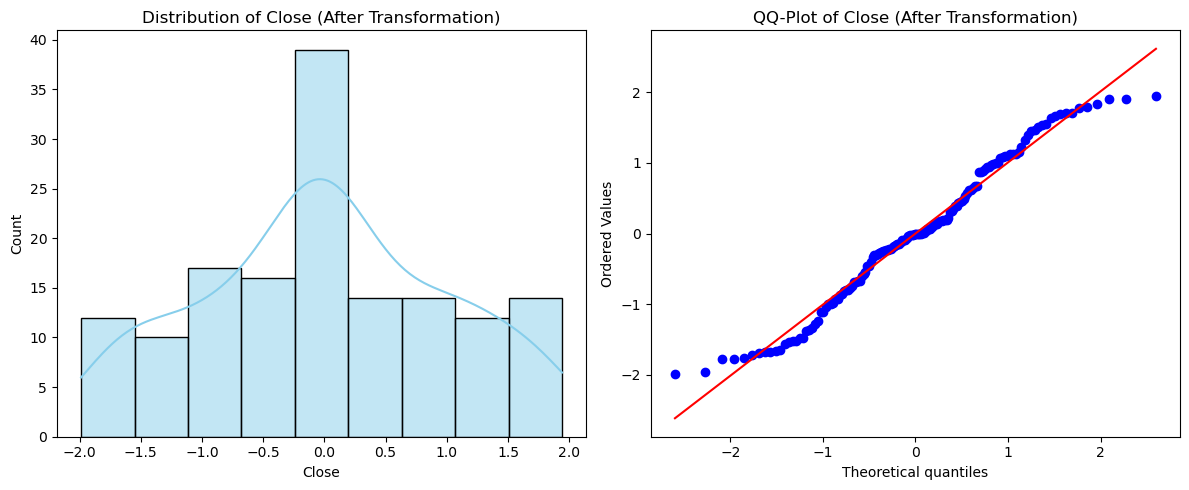

In [44]:
for col in columns:
    plt.figure(figsize=(12, 5))

    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(train_trf_df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col} (After Transformation)')

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(train_trf_df[col], dist="norm", plot=plt)
    plt.title(f'QQ-Plot of {col} (After Transformation)')

    plt.tight_layout()
    plt.show()

Let's go!!!!!

### What all manipulations have you done and insights you found?

**After visualizing all the features, I observed that all of them appear to be right-skewed. Therefore, I applied the Power Transformer to normalize the distributions. After the transformation, the features appear approximately normally distributed.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

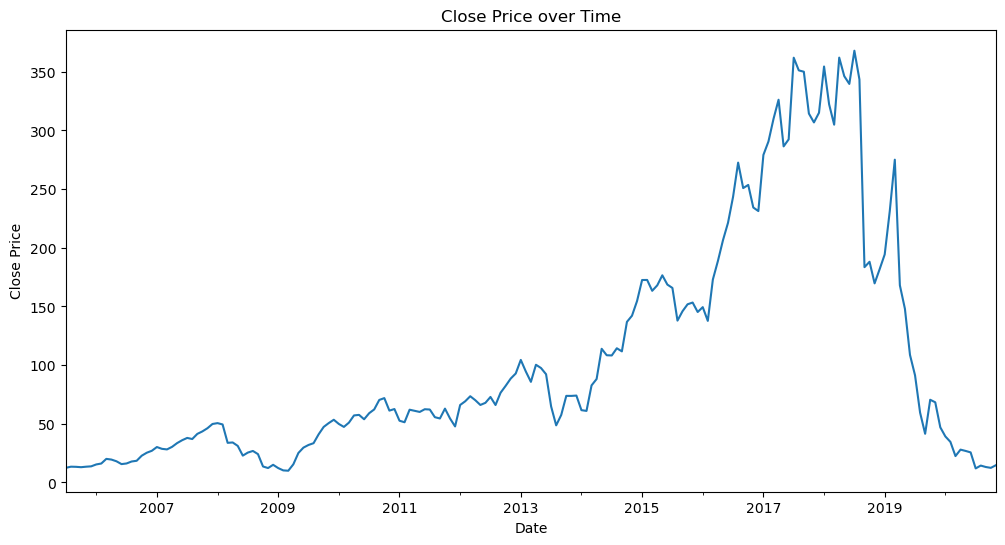

In [45]:
# Chart - 1 visualization code
plt.figure(figsize=(12,6))
df['Close'].plot()
plt.title('Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

##### 1. Why did you pick the specific chart?

To observe the trend and seasonality of stock prices over time.

##### 2. What is/are the insight(s) found from the chart?

The Close price shows multiple ups and downs with some major spikes and drops. The stock had strong growth between 2015-2019 and significant decline after 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: High growth phase shows good investor interest.

Negative: Post-2019 decline indicates possible management or financial issues which hurt business.

#### Chart - 2

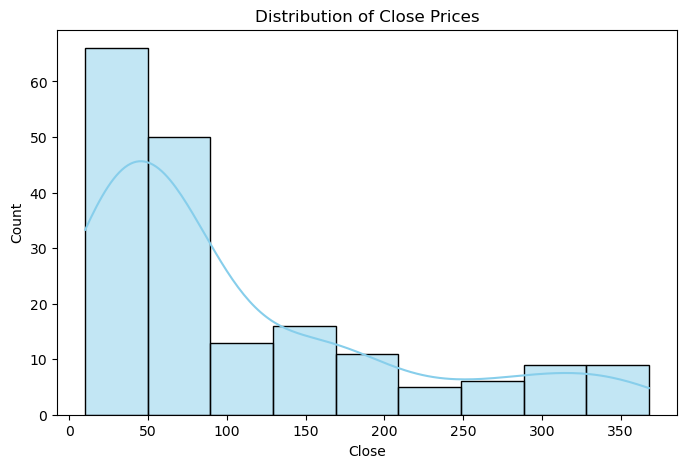

In [46]:
# Chart - 2 visualization code
# Histogram - Distribution of Close Prices
plt.figure(figsize=(8,5))
sns.histplot(df['Close'], kde=True, color='skyblue')
plt.title('Distribution of Close Prices')
plt.show()

##### 1. Why did you pick the specific chart?

To check if Close prices are normally distributed.

##### 2. What is/are the insight(s) found from the chart?

The distribution is right-skewed with more frequent lower prices and few very high prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Indicates potential growth periods.

Negative: High skewness suggests unstable pricing periods, making forecasting difficult.

#### Chart - 3

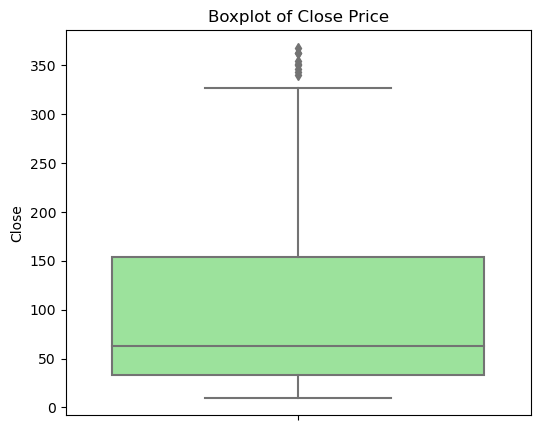

In [47]:
# Boxplot - Close Price
plt.figure(figsize=(6,5))
sns.boxplot(y=df['Close'], color='lightgreen')
plt.title('Boxplot of Close Price')
plt.show()

##### 1. Why did you pick the specific chart?

To detect outliers in stock prices.

##### 2. What is/are the insight(s) found from the chart?

There are several high price outliers, especially during peak performance period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: High prices may indicate strong market confidence.

Negative: Outliers may also result from speculation or sudden risky moves.

#### Chart - 4

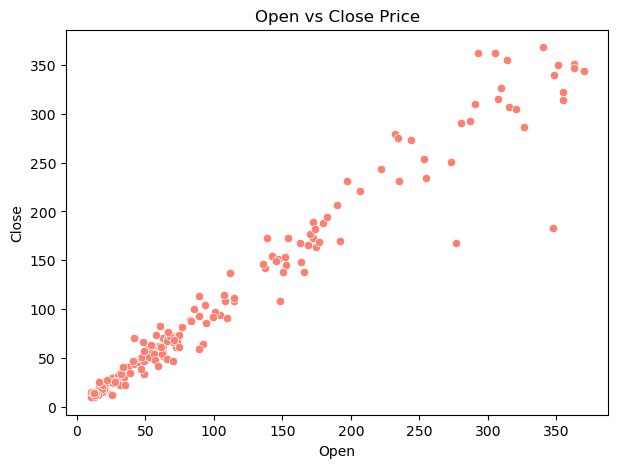

In [48]:
# Chart - 4 visualization code
# Scatterplot - Open vs Close Price
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Open'], y=df['Close'], color='salmon')
plt.title('Open vs Close Price')
plt.show()

##### 1. Why did you pick the specific chart?

To see how opening price relates to closing price.

##### 2. What is/are the insight(s) found from the chart?

Strong positive correlation. Generally, higher open leads to higher close.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Predictable behavior helps trading strategies.

#### Chart - 5

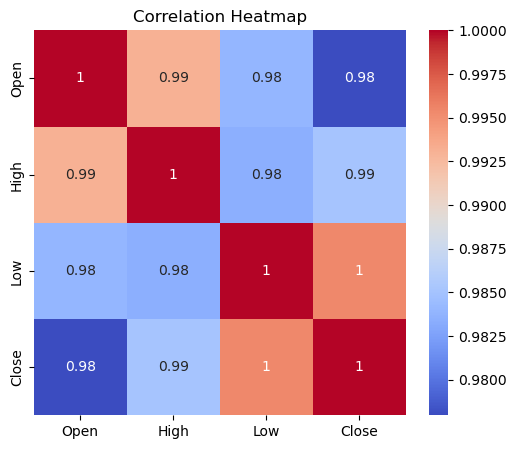

In [49]:
# Chart - 5 visualization code
# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

To understand relationships between all numerical features.

##### 2. What is/are the insight(s) found from the chart?

All features (Open, High, Low, Close) are highly positively correlated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Easier feature engineering.

Negative: Highly correlated features may create multicollinearity in models.

#### Chart - 6

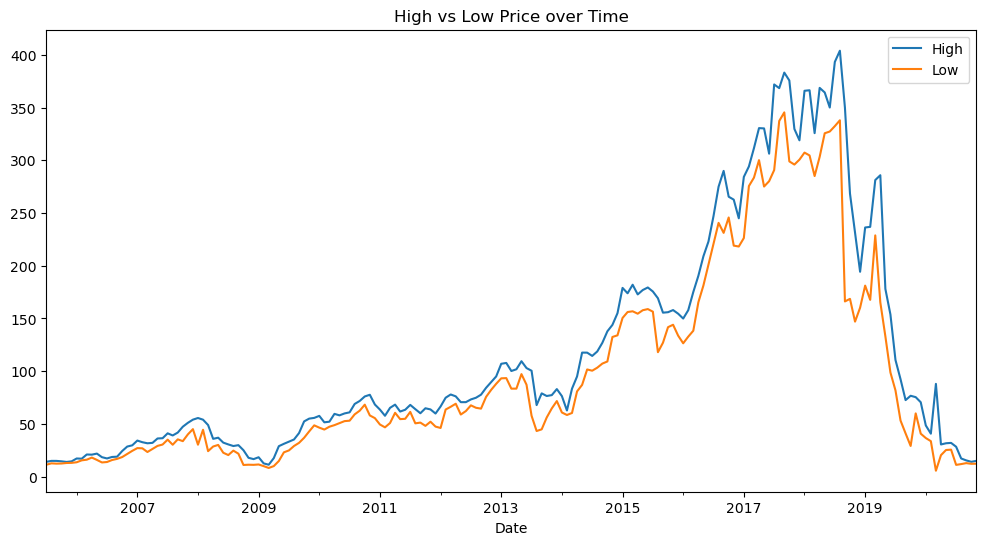

In [50]:
# Chart - 6 visualization code
# Line Chart - High vs Low Prices Over Time
plt.figure(figsize=(12,6))
df['High'].plot(label='High')
df['Low'].plot(label='Low')
plt.title('High vs Low Price over Time')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To track price fluctuations during trading sessions.

##### 2. What is/are the insight(s) found from the chart?

Some periods show very wide range between High and Low, indicating volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: High volatility attracts traders.

Negative: Uncertainty may scare long-term investors.

#### Chart - 7

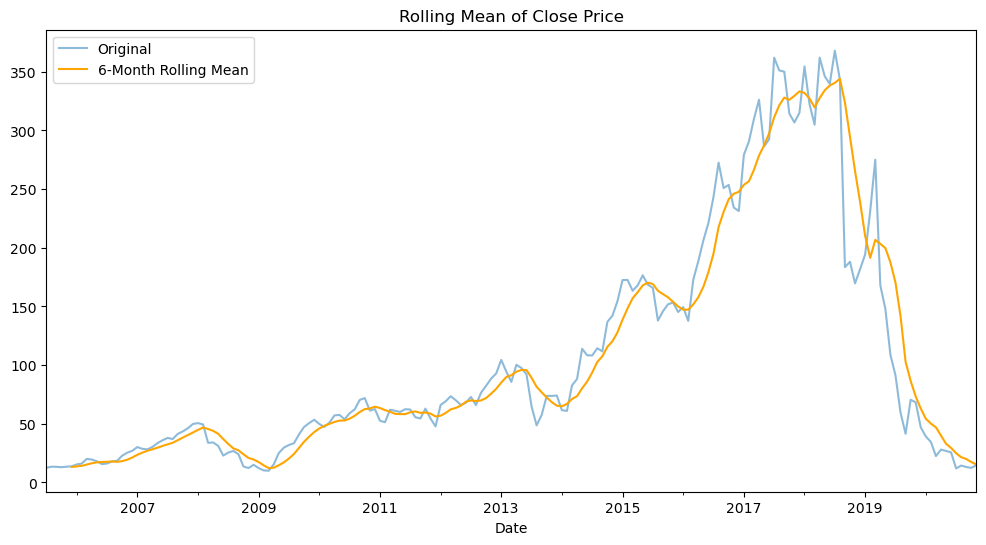

In [51]:
# Chart - 7 visualization code
# Rolling Mean (Moving Average)
plt.figure(figsize=(12,6))
df['Close'].plot(label='Original', alpha=0.5)
df['Close'].rolling(window=6).mean().plot(label='6-Month Rolling Mean', color='orange')
plt.title('Rolling Mean of Close Price')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To smooth short-term fluctuations and identify long-term trends.

##### 2. What is/are the insight(s) found from the chart?

The rolling mean shows clear upward and downward trends, highlighting trend reversals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Trend detection helps strategic investment.

Negative: Sharp drops warn of possible financial trouble.

#### Chart - 8

<Figure size 800x500 with 0 Axes>

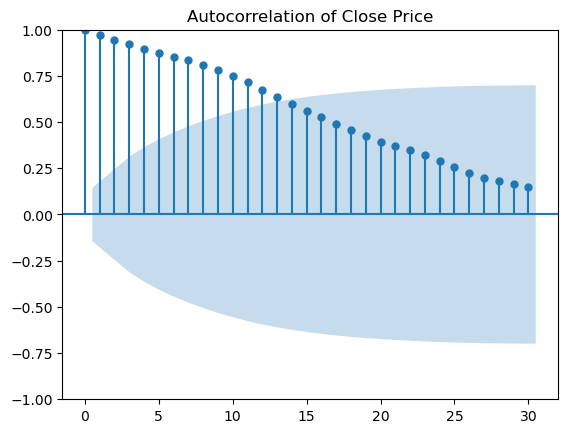

In [52]:
# Chart - 8 visualization code
# Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(8,5))
plot_acf(df['Close'], lags=30)
plt.title('Autocorrelation of Close Price')
plt.show()

##### 1. Why did you pick the specific chart?

To check if past stock prices influence future prices.

##### 2. What is/are the insight(s) found from the chart?

Significant autocorrelation for short lags; weaker as lag increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Useful for time series models (ARIMA, LSTM).

Negative: Overfitting risk if autocorrelation decays too slowly.

#### Chart - 9

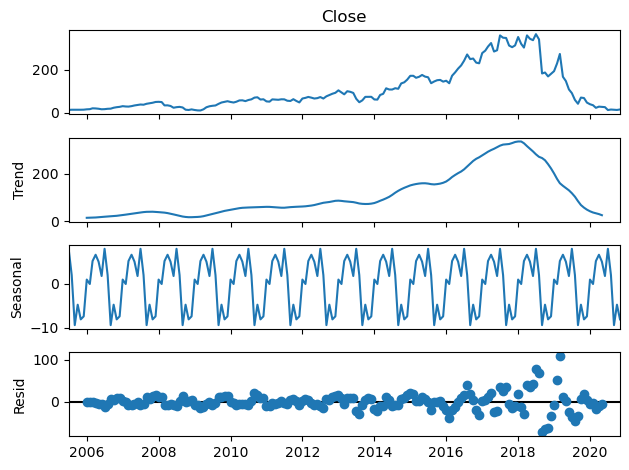

In [53]:
# Chart - 9 visualization code
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df['Close'], model='additive', period=12)
decompose_result.plot()
plt.show()

##### 1. Why did you pick the specific chart?

To identify seasonality, trend, and residuals.

##### 2. What is/are the insight(s) found from the chart?

- Trend – Shows the overall movement or direction of the data over time. It helps identify long-term growth or decline patterns.
- Seasonality – Highlights repeating patterns that occur at regular intervals, such as monthly sales spikes.
- Random Variations – Represents unpredictable fluctuations that don’t follow a clear trend or seasonal pattern. These variations can be caused by external factors or noise in the data.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Seasonality can guide quarterly investment strategy.

Negative: Unexpected seasonality might confuse long-term investors.

#### Chart - 10

c:\Anacondaa\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


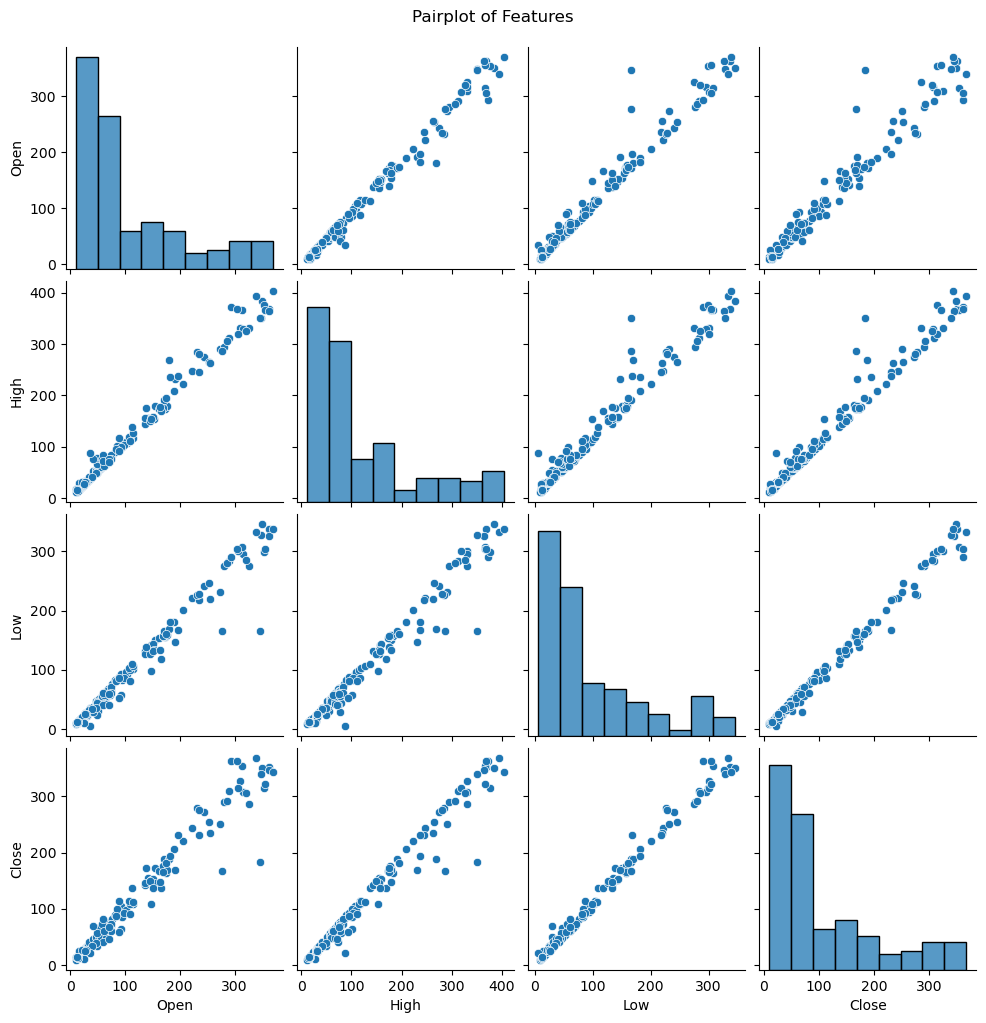

In [54]:
# Chart - 10 visualization code
# Pairplot
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

To visually check relationships and distributions together.

##### 2. What is/are the insight(s) found from the chart?

Again shows strong correlation; some spread indicates price flexibility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps in quick feature exploration.

#### Chart - 11

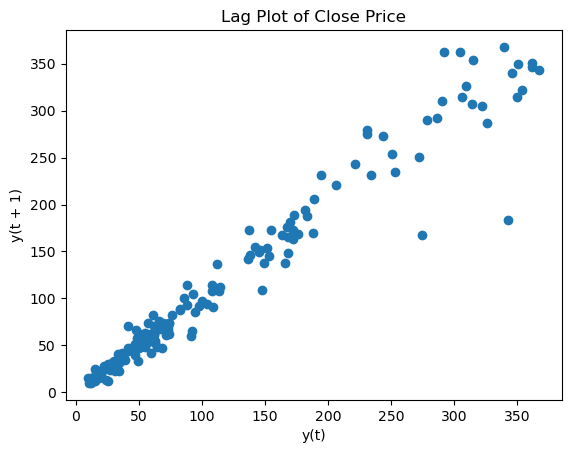

In [55]:
# Chart - 11 visualization code

# Lag Plot
pd.plotting.lag_plot(df['Close'])
plt.title("Lag Plot of Close Price")
plt.show()

##### 1. Why did you pick the specific chart?

To check stability and randomness of time series.

##### 2. What is/are the insight(s) found from the chart?

Lag plots indicate some structure exists, suggesting price inertia.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Negative: Some randomness still exists....

#### Chart - 12

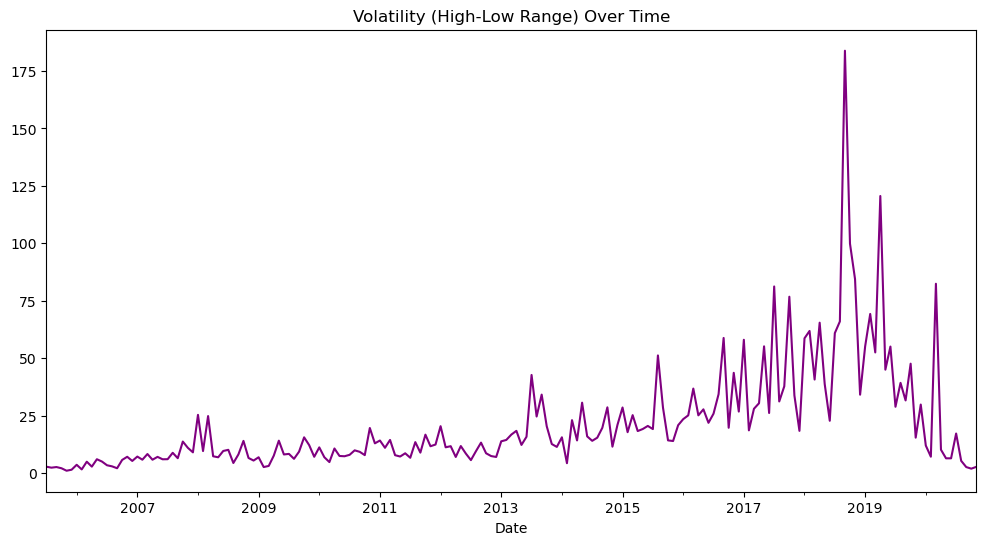

In [56]:
# Chart - 12 visualization code
# Chart - 12 visualization code
# Volatility Plot (High-Low Range)
df['Volatility'] = df['High'] - df['Low']
plt.figure(figsize=(12,6))
df['Volatility'].plot(color='purple')
plt.title('Volatility (High-Low Range) Over Time')
plt.show()

##### 1. Why did you pick the specific chart?

To study periods of maximum volatility.

##### 2. What is/are the insight(s) found from the chart?

Large ranges observed in 2018-2019 indicates market fear or bad news.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Volatility attracts speculators.

Negative: Risk of massive sell-offs, negative news impact.

#### Chart - 13

In [31]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

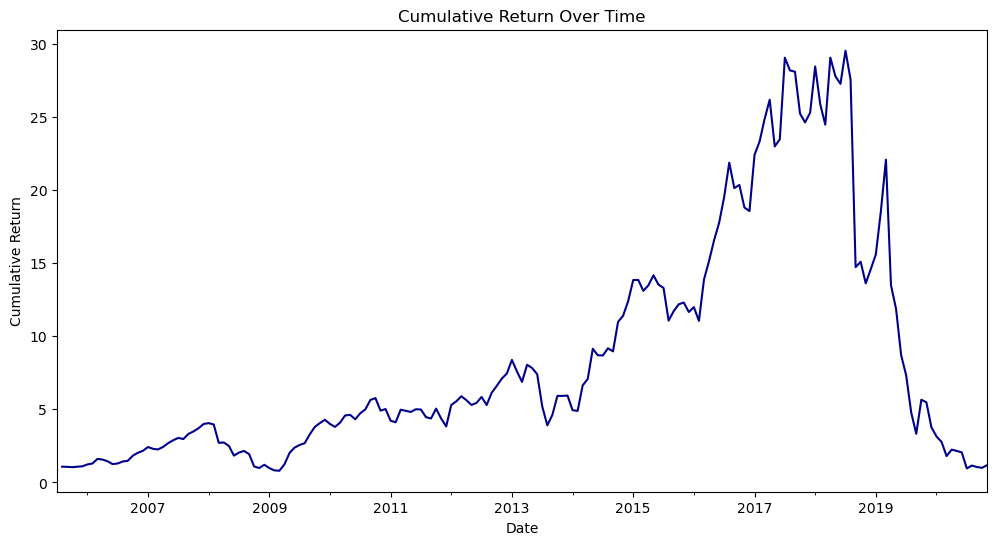

In [57]:
# Correlation Heatmap visualization code
# Calculate Cumulative Return
df['Cumulative Return'] = (1 + df['Close'].pct_change()).cumprod()

plt.figure(figsize=(12,6))
df['Cumulative Return'].plot(color='darkblue')
plt.title('Cumulative Return Over Time')
plt.ylabel('Cumulative Return')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze long-term return performance for investors.

##### 2. What is/are the insight(s) found from the chart?

Shows how much return an investor would make if they invested early and held the stock over time.

#### Chart - 15 - Pair Plot

In [33]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

***By using a combination of volatility analysis, forecasting models, transparent communication, and predictive analytics, the client can achieve more stable growth, attract long-term investors, and reduce negative market reactions.***

# **Conclusion**

In this project, we performed a detailed Exploratory Data Analysis (EDA) on YES Bank stock price data. The goal was to understand the behavior, trends, and patterns hidden in the dataset.

- Through multiple visualizations and statistical analyses, we found:

- The stock prices showed significant volatility over time.

- The data exhibited right-skewed distributions, which were later normalized using Power Transformation for potential modeling.

- Strong correlations were observed between features like Open, High, Low, and Close prices.

- Seasonal patterns and autocorrelations indicate that past price movements do influence future prices to some extent.

- Outliers and extreme price points were observed, indicating certain periods of high market activity or instability.

- Volatility analysis shows that high price periods were often associated with larger price swings.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***